## Problem Statement:
Dataset contains 4000 news headlines. We have to use neural network to predict whether the news is fake or real.

### 1. Read csv file

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/dell/Downloads/news.csv") 
df

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1
...,...,...
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1


### 2. Preprocessing of Text

In [2]:
import re
pre = []
for i in df['Headline']:
    # Step 1 : Convert to lower case
    s = i.lower()
    # Step 2 : Remove special characters
    s = re.sub('[^a-z ]','',s)
    pre.append(s)

In [3]:
#Viewing first five preprocessed headlines
pre[0:5]

['four ways bob corker skewered donald trump',
 'linklaters war veteran comedy speaks to modern america says star',
 'trumps fight with corker jeopardizes his legislative agenda',
 'egypts cheiron wins tieup with pemex for mexican onshore oil field',
 'jason aldean opens snl with vegas tribute']

In [4]:
#Add new column for preprocessed headlines 
df["preprocessed"] = pre
df.head()

,Headline,Label,preprocessed
0,Four ways Bob Corker skewered Donald Trump,1,four ways bob corker skewered donald trump
1,Linklater's war veteran comedy speaks to moder...,1,linklaters war veteran comedy speaks to modern...
2,Trump’s Fight With Corker Jeopardizes His Legi...,1,trumps fight with corker jeopardizes his legis...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,egypts cheiron wins tieup with pemex for mexic...
4,Jason Aldean opens 'SNL' with Vegas tribute,1,jason aldean opens snl with vegas tribute


### 3. Using TFIDF Vectorizer

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['preprocessed']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(4009, 7292)

In [7]:
Y = df["Label"]

In [8]:
Y.value_counts()

0    2137
1    1872
Name: Label, dtype: int64

### 4. Train-Test-Split

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

In [10]:
xtrain.shape

(3207, 7292)

In [11]:
xtest.shape

(802, 7292)

### 5. Build and Train Neural Networks

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [13]:
nn = Sequential()

nn.add(Dense(256,input_dim=xtrain.shape[1],activation='relu'))
nn.add(Dropout(0.6))

nn.add(Dense(128,activation='relu'))
nn.add(Dropout(0.6))

nn.add(Dense(1,activation='sigmoid'))

In [14]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1867008   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,900,033
Trainable params: 1,900,033
Non-trainable params: 0
_________________________________________________________________


In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=25)

In [16]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
hist = nn.fit(xtrain, ytrain,
              validation_split=0.2,
              batch_size=8,
              epochs=100,
              callbacks=[early_stop])

Epoch 1/100
321/321 [==============================] - 20s 50ms/step - loss: 0.6218 - accuracy: 0.6304 - val_loss: 0.4204 - val_accuracy: 0.8224
Epoch 2/100
321/321 [==============================] - 15s 48ms/step - loss: 0.2786 - accuracy: 0.8877 - val_loss: 0.3437 - val_accuracy: 0.8474
Epoch 3/100
321/321 [==============================] - 20s 63ms/step - loss: 0.0885 - accuracy: 0.9692 - val_loss: 0.3826 - val_accuracy: 0.8598
Epoch 4/100
321/321 [==============================] - 16s 51ms/step - loss: 0.0312 - accuracy: 0.9930 - val_loss: 0.4282 - val_accuracy: 0.8676
Epoch 5/100
321/321 [==============================] - 18s 56ms/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.4589 - val_accuracy: 0.8707
Epoch 6/100
321/321 [==============================] - 18s 55ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.4999 - val_accuracy: 0.8692
Epoch 7/100
321/321 [==============================] - 19s 59ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.5327 - val_ac

### 6. Observe learning curve

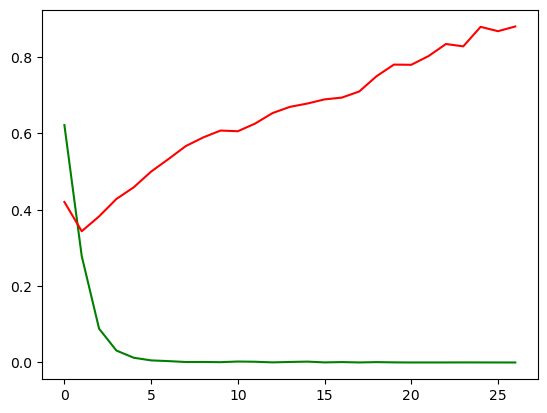

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],c='green')
plt.plot(hist.history['val_loss'],c='red')

### 7. Evaluate Training and Testing Data

In [19]:
nn.evaluate(xtrain,ytrain)

101/101 [==============================] - 2s 12ms/step - loss: 0.1762 - accuracy: 0.9719


[0.17615781724452972, 0.9719364047050476]

In [20]:
nn.evaluate(xtest, ytest)

26/26 [==============================] - 0s 8ms/step - loss: 0.8818 - accuracy: 0.8479


[0.8817975521087646, 0.8478803038597107]

### 8. Predicting test values

In [21]:
prob = nn.predict(xtest)

26/26 [==============================] - 2s 10ms/step


In [22]:
prob[0:5]

array([[3.3964113e-11],
       [2.5480229e-04],
       [9.9997860e-01],
       [9.9962747e-01],
       [8.5253698e-01]], dtype=float32)

In [23]:
preds = []
for i in prob:
    if i>=0.5:
        preds.append(1)
    else:
        preds.append(0)

In [24]:
preds[0:5]

[0, 0, 1, 1, 1]

### 9. Evaluate testing data using sklearn metrics

In [25]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest, preds)
cf

array([[369,  62],
       [ 60, 311]], dtype=int64)

<AxesSubplot:>

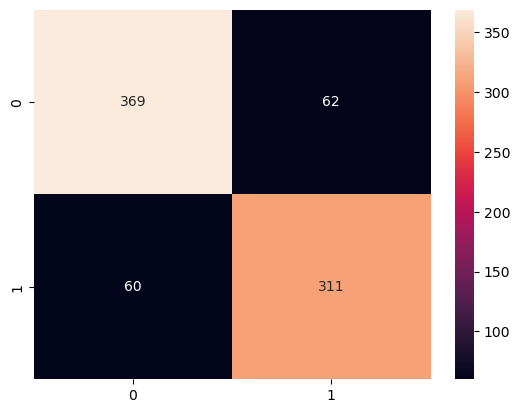

In [26]:
#Visualizing confusion matrix
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       431
           1       0.83      0.84      0.84       371

    accuracy                           0.85       802
   macro avg       0.85      0.85      0.85       802
weighted avg       0.85      0.85      0.85       802

